In [1]:
import glob
from sklearn.metrics import mean_absolute_error
import pandas
import matplotlib.pyplot as plt

import proxima_analysis as pa
import numpy as np

In [2]:
root_path = "../proxima_data"

In [3]:
def get_true_run(true_energy, surrogate_energy_true, surrogate_energy_values):
    e_true = np.array(true_energy[0:])
    e_used = np.array(true_energy[0:])
    for s, e in zip(surrogate_energy_true['step'], surrogate_energy_values):
        e_used[s-1] = e

    #e_diff = np.abs(e_used - e_true)
    #e_diff
    #plt.plot(e_diff, '.')
    return e_used


In [4]:
from matplotlib.pyplot import figure
#fig, ax = plt.subplots(nrows=len(ct), figsize=(16,20))
def plot_mae_interval(ct):
    my_keys = sorted(list(ct.keys()))
    figure(figsize=(20,10))
    for count, key in enumerate(my_keys):
        x_plt = []
        y_plt = []
        for d in ct[key]:
            x_plt.append(int(list(d.keys())[0]))
            y_plt.append(float(list(d.values())[0]))
        x_plt, y_plt = zip(*sorted(zip(x_plt,y_plt)))
        #print(x_plt, y_plt)
        if len(x_plt) > 2:
            plt.plot(x_plt, y_plt,'-o',label="uq_tol "+str(key))
            plt.legend()
        plt.xlabel('Interval')
        plt.ylabel('Mean Absolute Error')

        plt.title('MAE across intervals and UQ thresholds')

## Surrogate only results - Temperature 500

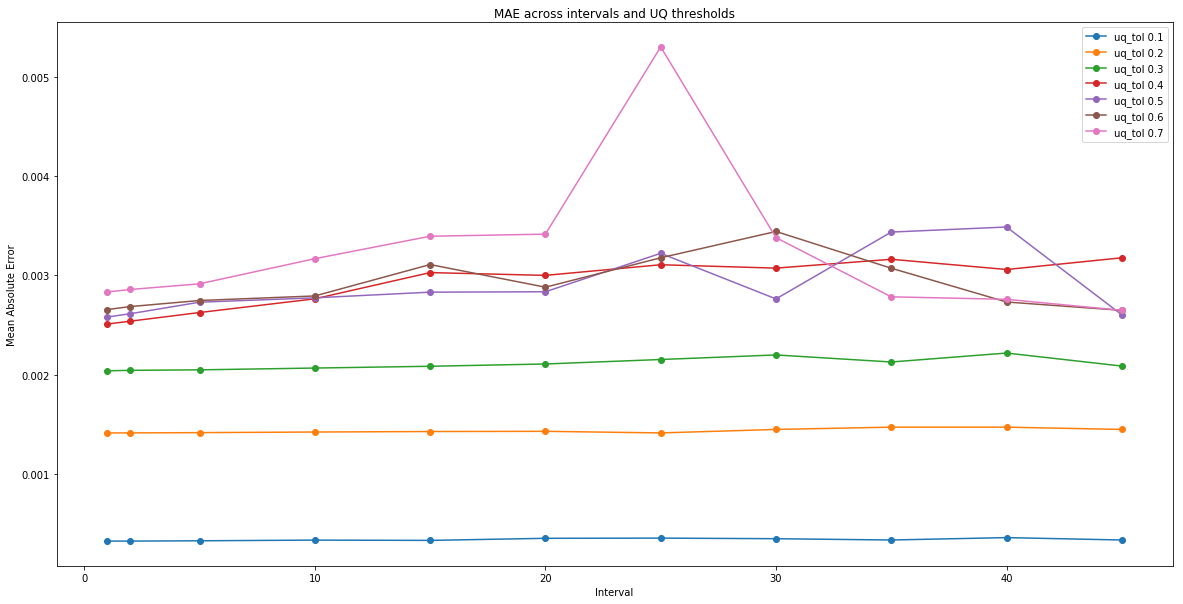

In [5]:
all_results = glob.glob(root_path + "/surrogate_only/*")#19Jun20-05*
ct = pa.process_mae_ct(all_results)
plot_mae_interval(ct)

## Simple surrogate, Temperature 1000
Trying different retrain intervals and uq thresholds

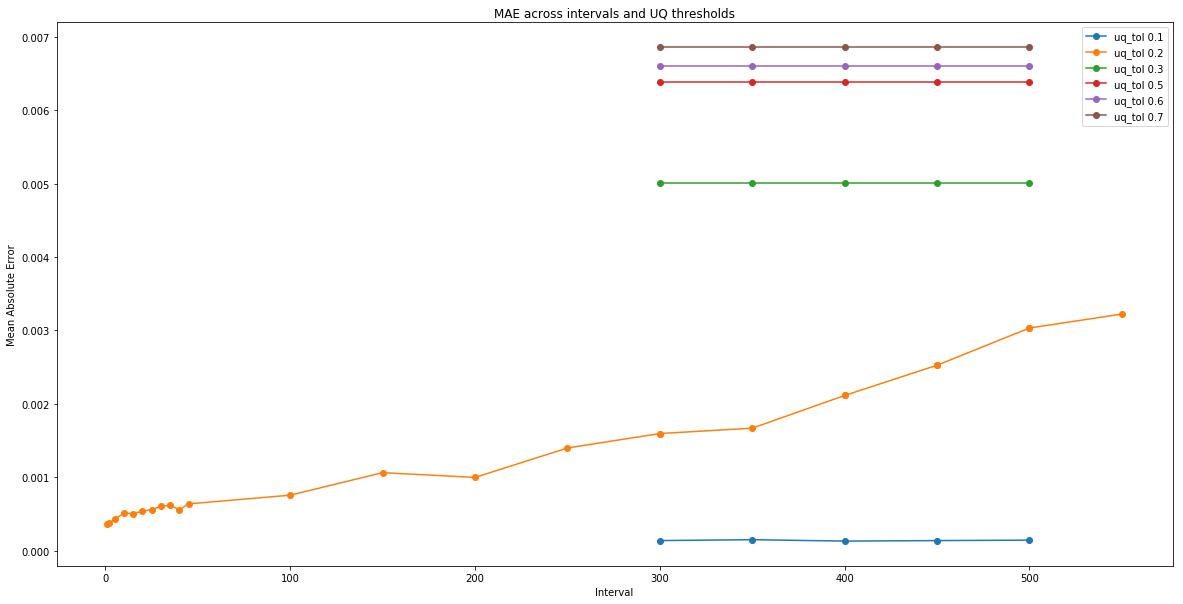

In [6]:
all_results = glob.glob(root_path + "/SST1000_bestparameters/*")#19Jun20-05*
ct = pa.process_mae_ct(all_results)
plot_mae_interval(ct)